In [8]:
import pandas as pd
import matplotlib.pyplot as plt



In [33]:
data= pd.read_excel('bac_results.xlsx', sheet_name='Export Worksheet')

I filtered the data to get only the students that were following the same track as me in high school.
That would be Mathematics-Informatics, Computer Science, and the Romanian Language.

In [56]:
data=data[data['Subiect ed']=='Informatică MI C/C++']
data=data[data['Subiect ec']=='Matematică MATE-INFO']
data=data[data['Subiect ea']=='Limba română (REAL)']

Dropped the columns that are not relevant for the analysis.

In [57]:
data_clean=data.drop(columns=['Cod unic candidat', 'Sex', 'Specializare', 'Profil', 'Fileira',
       'Forma de învățământ', 'Mediu candidat', 'Unitate (SIIIR)',
       'Unitate (SIRUES)', 'Clasa', 'Subiect eb',
       'Limba modernă', 'Promoție', 'NOTE_RECUN_A',
       'NOTE_RECUN_B', 'NOTE_RECUN_C', 'NOTE_RECUN_D', 'NOTE_RECUN_EA',
       'NOTE_RECUN_EB', 'NOTE_RECUN_EC', 'NOTE_RECUN_ED', 'STATUS_A',
       'STATUS_B', 'STATUS_C', 'STATUS_D', 'STATUS_EA', 'STATUS_EB',
       'STATUS_EC', 'STATUS_ED', 'ITA', 'SCRIS_ITC', 'SCRIS_PMS', 'ORAL_PMO',
       'ORAL_IO', 'NOTA_EB', 'CONTESTATIE_EA',
       'NOTA_CONTESTATIE_EA', 'CONTESTATIE_EB', 'NOTA_CONTESTATIE_EB',
       'CONTESTATIE_EC', 'NOTA_CONTESTATIE_EC', 'CONTESTATIE_ED',
       'NOTA_CONTESTATIE_ED', 'PUNCTAJ DIGITALE', 'STATUS'])

Absent students were marked with -2, so I replaced the -2 with 0.

In [58]:
data_clean['NOTA_EA']=data_clean['NOTA_EA'].apply(lambda x: 0 if x<0 else x)
data_clean['NOTA_EC']=data_clean['NOTA_EC'].apply(lambda x: 0 if x<0 else x)
data_clean['NOTA_ED']=data_clean['NOTA_ED'].apply(lambda x: 0 if x<0 else x)

The mean was NaN for the absent students because of the -2 grade, so I replaced the NaN with the mean of the three grades.

In [59]:
data_clean['Medie']=data_clean[['NOTA_EA', 'NOTA_EC', 'NOTA_ED']].mean(axis=1).round(2)

In [62]:
# Grades to compare
grade_ea = 7.65
grade_ec = 9.5
grade_ed = 9.9

# Calculate the average of the specified grades
average_grade = (grade_ea + grade_ec + grade_ed) / 3

# Calculate percentages
percentage_ea = (data_clean['NOTA_EA'] <= grade_ea).mean() * 100
percentage_ec = (data_clean['NOTA_EC'] <= grade_ec).mean() * 100
percentage_ed = (data_clean['NOTA_ED'] <= grade_ed).mean() * 100
percentage_medie = (data_clean['Medie'] <= average_grade).mean() * 100

# Display results
percentages = {
    'Percentage NOTA_EA': percentage_ea,
    'Percentage NOTA_EC': percentage_ec,
    'Percentage NOTA_ED': percentage_ed,
    'Percentage Medie': percentage_medie
}

# These are the percentages of students with grades lower than me with all the other tracks included but that would be unfair 
# {'Percentage NOTA_EA': 60.536120421355044,
#  'Percentage NOTA_EC': 93.34300933684463,
#  'Percentage NOTA_ED': 94.33504907828585,
#  'Percentage Medie': 85.43886162317452}

percentages

{'Percentage NOTA_EA': 28.35000704523038,
 'Percentage NOTA_EC': 82.07693391573905,
 'Percentage NOTA_ED': 86.95223333803015,
 'Percentage Medie': 62.575736226574605}

In [65]:
# calculate 1- percentage to get top percentage
percentages = {
    'Percentage NOTA_EA': 100 - percentage_ea,
    'Percentage NOTA_EC': 100 - percentage_ec,
    'Percentage NOTA_ED': 100 - percentage_ed,
    'Percentage Medie': 100 - percentage_medie
}

In [66]:
percentages

{'Percentage NOTA_EA': 71.64999295476962,
 'Percentage NOTA_EC': 17.923066084260952,
 'Percentage NOTA_ED': 13.047766661969845,
 'Percentage Medie': 37.424263773425395}

In [73]:
data_clean[data_clean['NOTA_ED']==10].count()

Subiect ea    831
Subiect ec    831
Subiect ed    831
NOTA_EA       831
NOTA_EC       831
NOTA_ED       831
Medie         831
dtype: int64

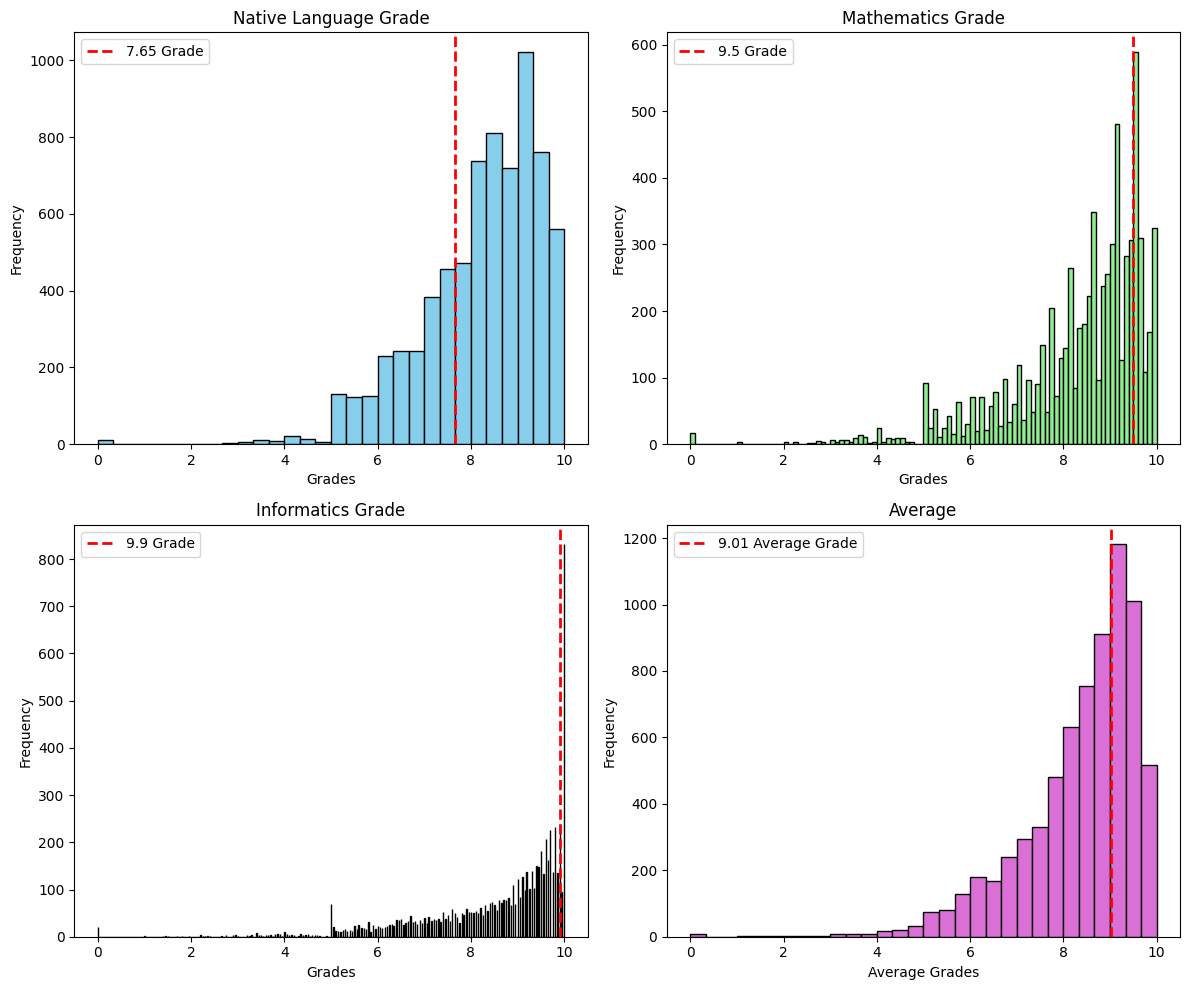

In [70]:

df = pd.DataFrame({
    'NOTA_EA': data_clean['NOTA_EA'],
    'NOTA_EC': data_clean['NOTA_EC'],
    'NOTA_ED': data_clean['NOTA_ED'],
    'Medie': data_clean['Medie']
})

grade_ea = 7.65
grade_ec = 9.5
grade_ed = 9.9
average_grade = (grade_ea + grade_ec + grade_ed) / 3

# Create the plot
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot for NOTA_EA
ax[0, 0].hist(df['NOTA_EA'], bins=30, color='skyblue', edgecolor='black')
ax[0, 0].axvline(grade_ea, color='red', linestyle='dashed', linewidth=2, label='7.65 Grade')
ax[0, 0].set_title('Native Language Grade')
ax[0, 0].set_xlabel('Grades')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].legend()

# Plot for NOTA_EC
ax[0, 1].hist(df['NOTA_EC'], bins=100, color='lightgreen', edgecolor='black')
ax[0, 1].axvline(grade_ec, color='red', linestyle='dashed', linewidth=2, label='9.5 Grade')
ax[0, 1].set_title('Mathematics Grade')
ax[0, 1].set_xlabel('Grades')
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].legend()

# Plot for NOTA_ED
ax[1, 0].hist(df['NOTA_ED'], bins=1000, color='lightcoral', edgecolor='black')
ax[1, 0].axvline(grade_ed, color='red', linestyle='dashed', linewidth=2, label='9.9 Grade')
ax[1, 0].set_title('Informatics Grade')
ax[1, 0].set_xlabel('Grades')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].legend()

# Plot for Medie
ax[1, 1].hist(df['Medie'], bins=30, color='orchid', edgecolor='black')
ax[1, 1].axvline(average_grade, color='red', linestyle='dashed', linewidth=2, label='9.01 Average Grade')
ax[1, 1].set_title('Average')
ax[1, 1].set_xlabel('Average Grades')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].legend()

plt.tight_layout()
plt.show()
